## Random Graph Analysis and its Characteristic


Analyse the random graphs G(n, p), where p = ⟨k⟩/(n − 1), as function of ⟨k⟩, by performing following tasks:

1. Draw a random graph with n = 1000 for each value of ⟨k⟩ = 0.1, 1, 2, 10 and discuss qualitatively how the graphs change with ⟨k⟩. 
2. Find the standard deviation $σ_{m}$ of the number of edges m and plot the distribution of m for the each values of ⟨k⟩. 
3. Find the standard deviation $σ_{k}$ of degree k and plot the distribution of of k for the each values of ⟨k⟩.
4. Calculate the diameter and the distance distribution for n = 20, 100, 1000 of the random graph for for the each value of ⟨k⟩. Discuss the dependence on ⟨k⟩, and n. 

    **Note:** if there is more than one component, disregard the distances between components, since they are infinite, and calculate the distances only in the giant component).

5. Calculate the mean eigenvector centrality and their distributions for n = 1000 of the random graph for each value of ⟨k⟩. Discuss the dependence on ⟨k⟩.
6. Calculate the mean betweenness centrality and their distributions for n = 1000 of the random graph for each value of ⟨k⟩. Discuss the dependence on ⟨k⟩.
7. Calculate the mean closenness centrality and page rank and their distributions for n = 1000 of the random graph for each value of ⟨k⟩. Discuss the dependence on ⟨k⟩.
8. Calculate the mean clustering coefficient and distributions for n = 20, 100, 1000 of the random graph for each value of ⟨k⟩. Discuss the dependence on ⟨k⟩ and n.

In [2]:
# import required libraries

import my_graph
import networkx as nx
import matplotlib.pyplot as plt
from statistics import stdev

### 1. Draw a random graph with n = 1000 for each value of ⟨k⟩ = 0.1, 1,  2, 10 and discuss qualitatively how the graphs change with ⟨k⟩.

#### a. Draw a random graph with n = 1000 for each value of ⟨k⟩ = 0.1, 1, 2, 10:

For Random Graph with <k>= 0.1
Number of components in the graph are: 955
Size of the largest component of the graph is: 3 

For Random Graph with <k>= 1
Number of components in the graph are: 540
Size of the largest component of the graph is: 50 

For Random Graph with <k>= 2
Number of components in the graph are: 143
Size of the largest component of the graph is: 839 

For Random Graph with <k>= 10
Number of components in the graph are: 1
Size of the largest component of the graph is: 1000 






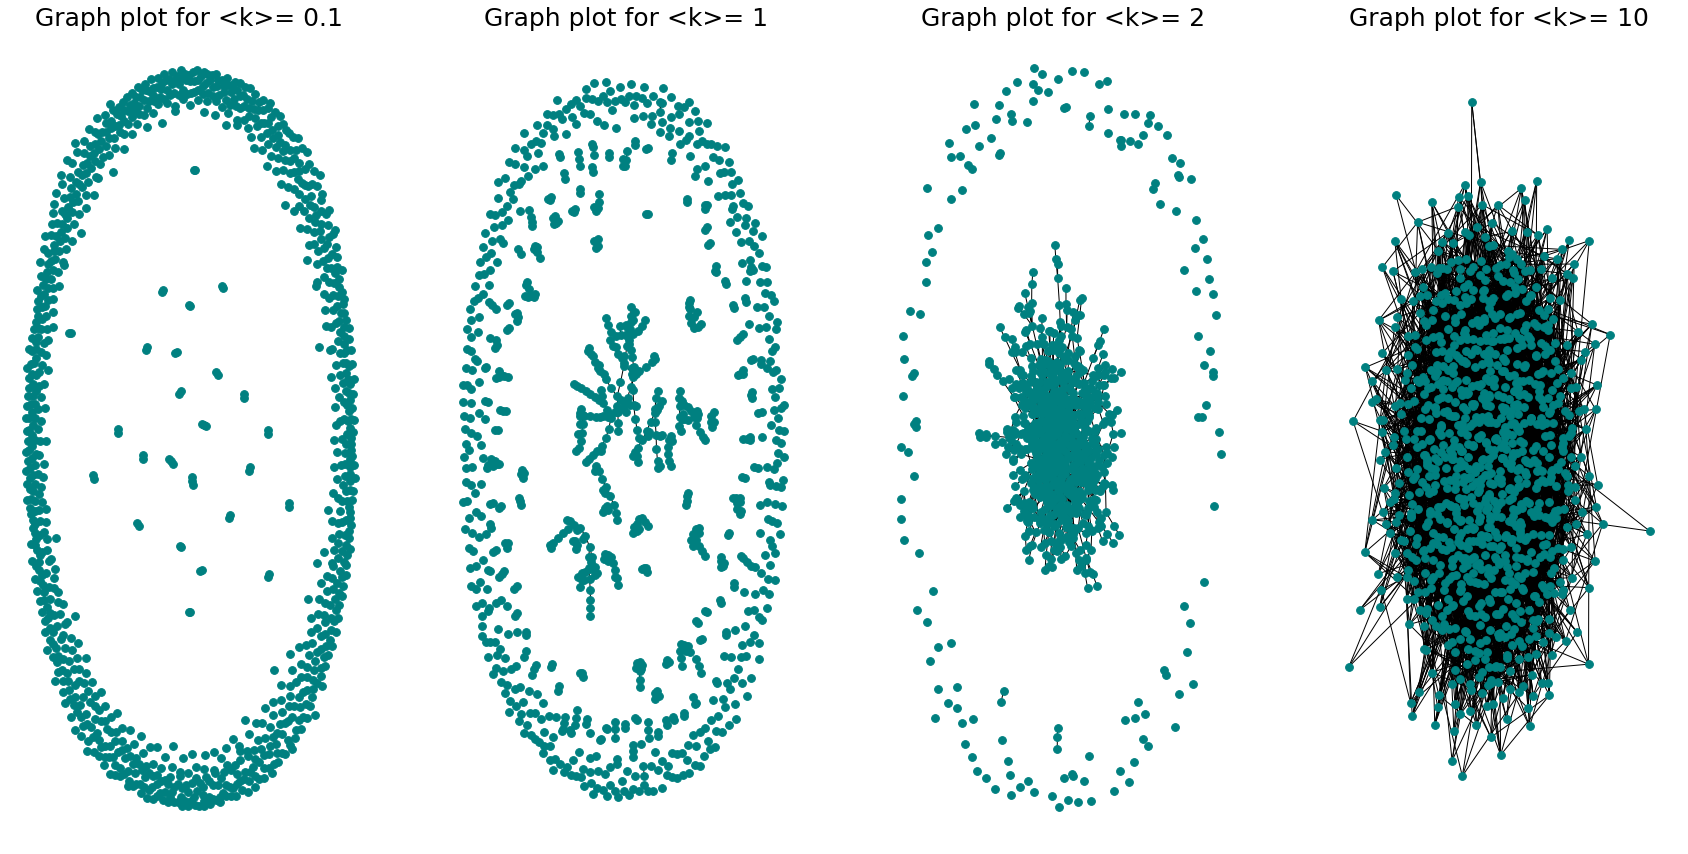

In [3]:
n = 1000
k_values = [0.1, 1, 2, 10]
rG_list = []

# Configure figures
plt.figure(figsize=(30, 15))
fig_num = 140

for k in k_values:
    fig_num += 1
    prob = k/(n-1)
    
    # Generate random graph
    rG = nx.gnp_random_graph(n=n, p=prob)
    
    rG_list.append(rG)
    plt.subplot(fig_num)
    nx.draw(rG, with_labels=False, node_color='teal', node_size=60)
    plt.title(f'Graph plot for <k>= {k}', size=25)
    
    print(f"For Random Graph with <k>= {k}")
    #Count the number of components of the graph
    num_comp = nx.number_connected_components(rG)
    print(f"Number of components in the graph are: {num_comp}")
    
    # find the the size of the largest component
    lg_comp = rG.subgraph(max(nx.connected_components(rG), key=len)).copy()
    print(f"Size of the largest component of the graph is: {lg_comp.number_of_nodes()}","\n")

print("\n\n")

#### b. Discuss qualitatively how the graphs change with ⟨k⟩

**We observe that:**

1. For `⟨k⟩ = 0.1`, graph has `mostly singleton nodes`. The graph is `highly disconnected` with only very few connected vertices in pairs.
2. For `⟨k⟩ = 1 and 2`, graph has `a giant component` and some `other connected components`.
3. For `⟨k⟩ = 10`, graph is a now `highly connected with no singletons`.  
    Because, in this case, ⟨k⟩ = 10 is greater than $\ln n$ (which is $\ln 100$ = 4.6). 

**Hence we can say that:**

* For very low values of ⟨k⟩, the graph is highly disconnected. Graph has mostly singleton nodes and very few numbers of vertices which are connected to other vertex.
* As value of ⟨k⟩ increases, number of connected vertices with each other increases. Hence, in graph, a giant component starts to form and some other smaller components as well.
* When ⟨k⟩ becomes greater than $\ln n$, graph becomes fully connected and there are no singletons in the graph.

### 2. Find the standard deviation $σ_{m}$ of the number of edges m and plot the distribution of m for the each values of ⟨k⟩:

Edge list for value <k> = 0.1: [38, 51, 58, 42, 44, 51, 56, 54, 58, 48, 55, 46, 52, 48, 49, 61, 56, 63, 57, 64]
Standard deviatiation for value <k> = 0.1 is: 6.96 



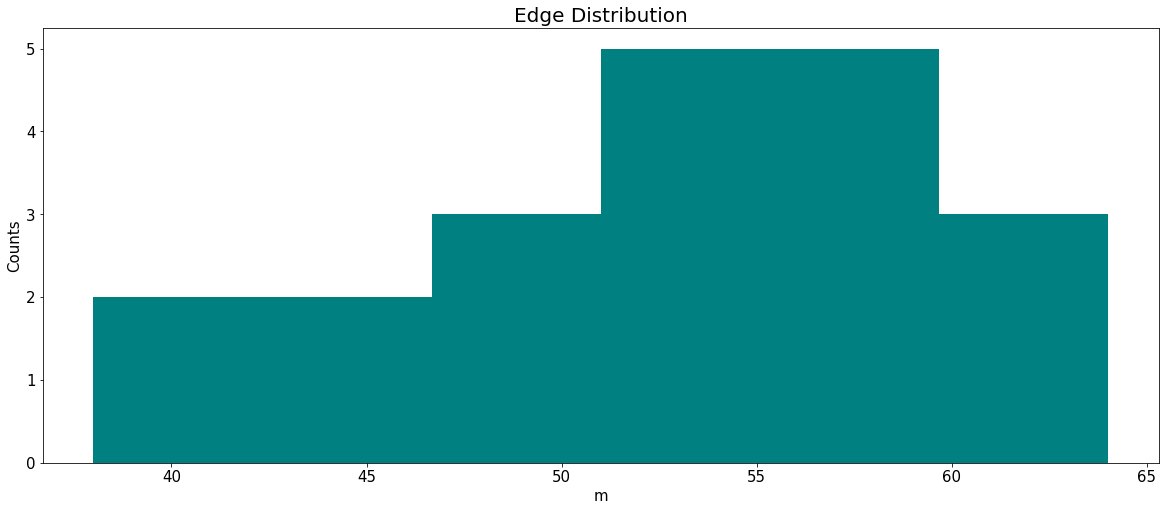

Edge list for value <k> = 1: [476, 492, 473, 497, 509, 479, 512, 485, 540, 505, 470, 505, 495, 518, 502, 487, 536, 468, 509, 488]
Standard deviatiation for value <k> = 1 is: 20.18 



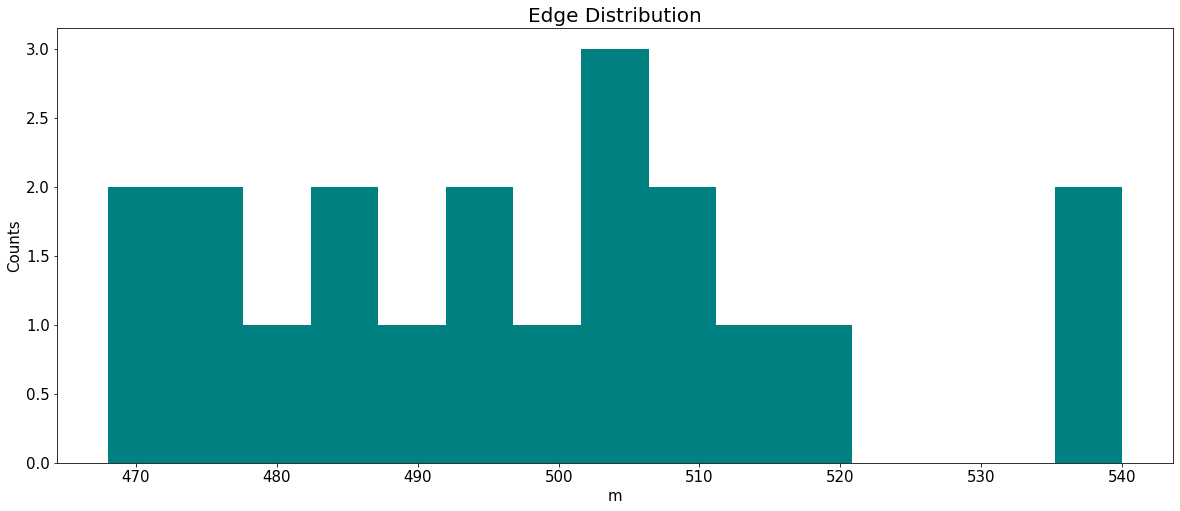

Edge list for value <k> = 2: [1036, 1019, 994, 1026, 962, 984, 927, 999, 952, 1037, 1038, 1064, 944, 1081, 1000, 1035, 1008, 945, 1023, 1024]
Standard deviatiation for value <k> = 2 is: 41.83 



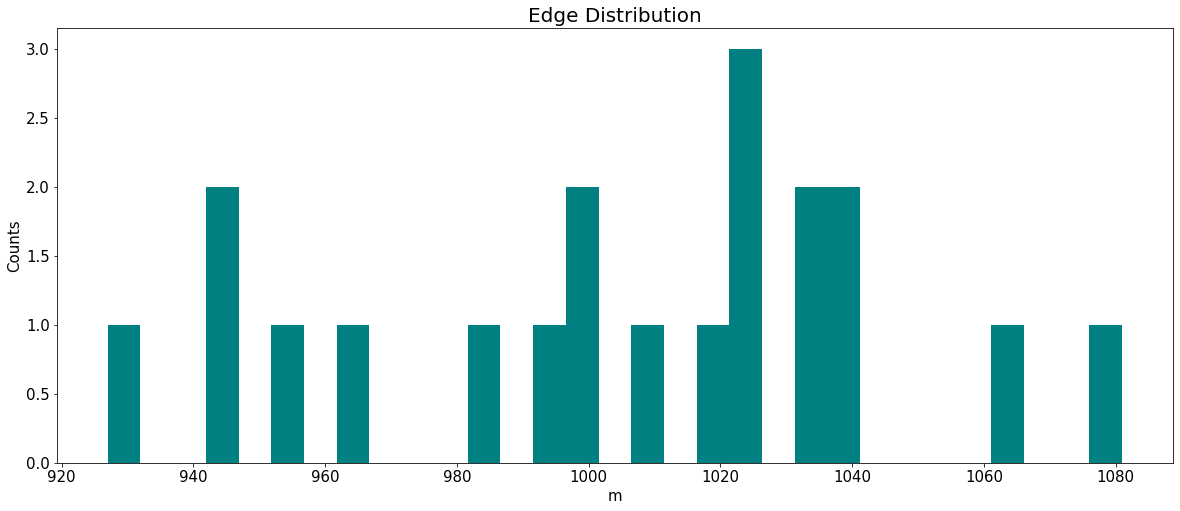

Edge list for value <k> = 10: [5021, 5019, 4979, 4986, 5024, 4933, 5042, 5000, 4964, 5048, 5099, 5041, 4944, 4953, 5100, 4953, 4998, 5027, 4936, 4966]
Standard deviatiation for value <k> = 10 is: 49.65 



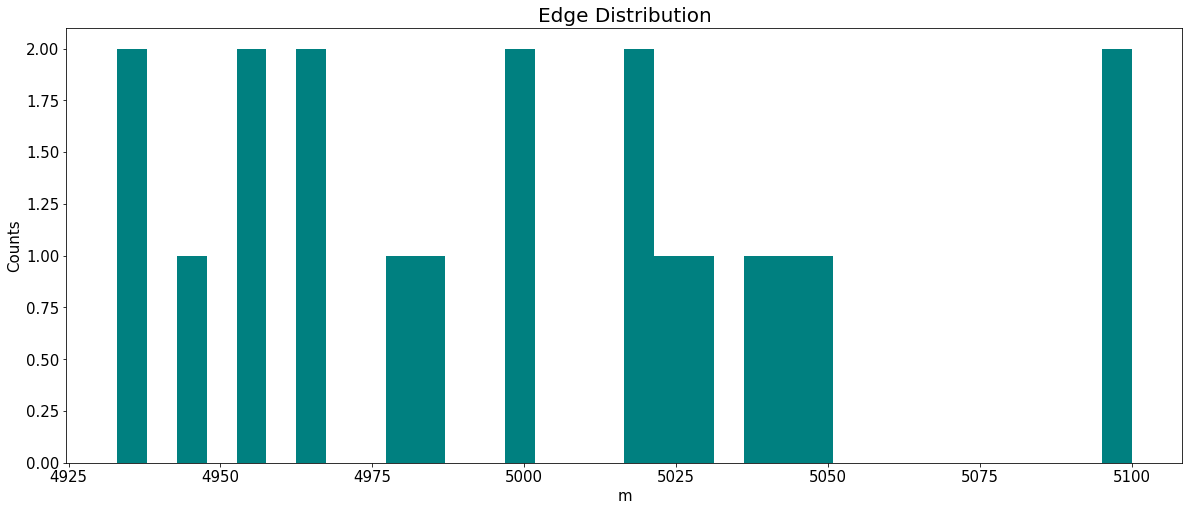

In [4]:
for k in k_values:
    edge_list = my_graph.find_num_of_edges(n,k)
    print("Edge list for value <k> = {}: {}".format(k, edge_list))
    
    std_dev = stdev(edge_list)
    print("Standard deviatiation for value <k> = {} is: {}".format(k, round(std_dev,2)),"\n")
    
    # plot historgram for edges(m) of the graph
    my_graph.plot_distribution(in_list=edge_list, pdf=False, cum=False, bw=5,\
                            title="Edge Distribution",\
                            x_label="m", y_label="Counts",\
                            x_scale="linear", y_scale="linear",\
                            c="teal")

### 3. Find the standard deviation $σ_{k}$ of degree k and plot the distribution of of k for the each values of ⟨k⟩:

Standard deviation of degree k is 
$$σ_{k} = \sqrt{(p(1-p)(n-1)}$$

here, 

    p = probability to draw one edge
    n = number of vertices/nodes

In [ ]:
plt.figure(figsize=(30, 8))
fig_num = 130

for i, rg in enumerate(rG_list):
    
    fig_num += 1
    degree_list = graph.find_degrees(rg, directed=False).values()
    
    std_dev = stdev(degree_list)
    print("Standard deviatiation for value <k> = {} is: {}".format(k_values[i], round(std_dev,2)),"\n")
    
    # plot historgram for degrees of the graph
    graph.plot_distribution(in_list=degree_list, pdf=False, cum=False, bw=1,\
                            title="Degree Distribution",\
                            x_label="Degrees", y_label="Counts",\
                            x_scale="linear", y_scale="linear", 
                            c="teal")

We can see from the above plot of Degree Distribution, Degree distribution is Poisson distribution and peak of distribution is at approx value of ⟨k⟩.

### 4. Calculate the diameter and the distance distribution for n = 20, 100, 1000 of the random graph for each value of ⟨k⟩. Discuss the dependence on ⟨k⟩, and n:

> (Note: if there is more than one component, disregard the distances between components, since they are infinite, and calculate the distances only in the giant component).

#### a. Calculate the diameter for n = 20, 100, 1000 of the random graph for ⟨k⟩ = 0.1, 1, 2, 10.

Diameter list for n = 20 and <k> = (0.1, 1, 2, 10): [0, 3, 8, 2]
Diameter list for n = 100 and <k> = (0.1, 1, 2, 10): [1, 14, 12, 4]
Diameter list for n = 1000 and <k> = (0.1, 1, 2, 10): [4, 34, 23, 5]





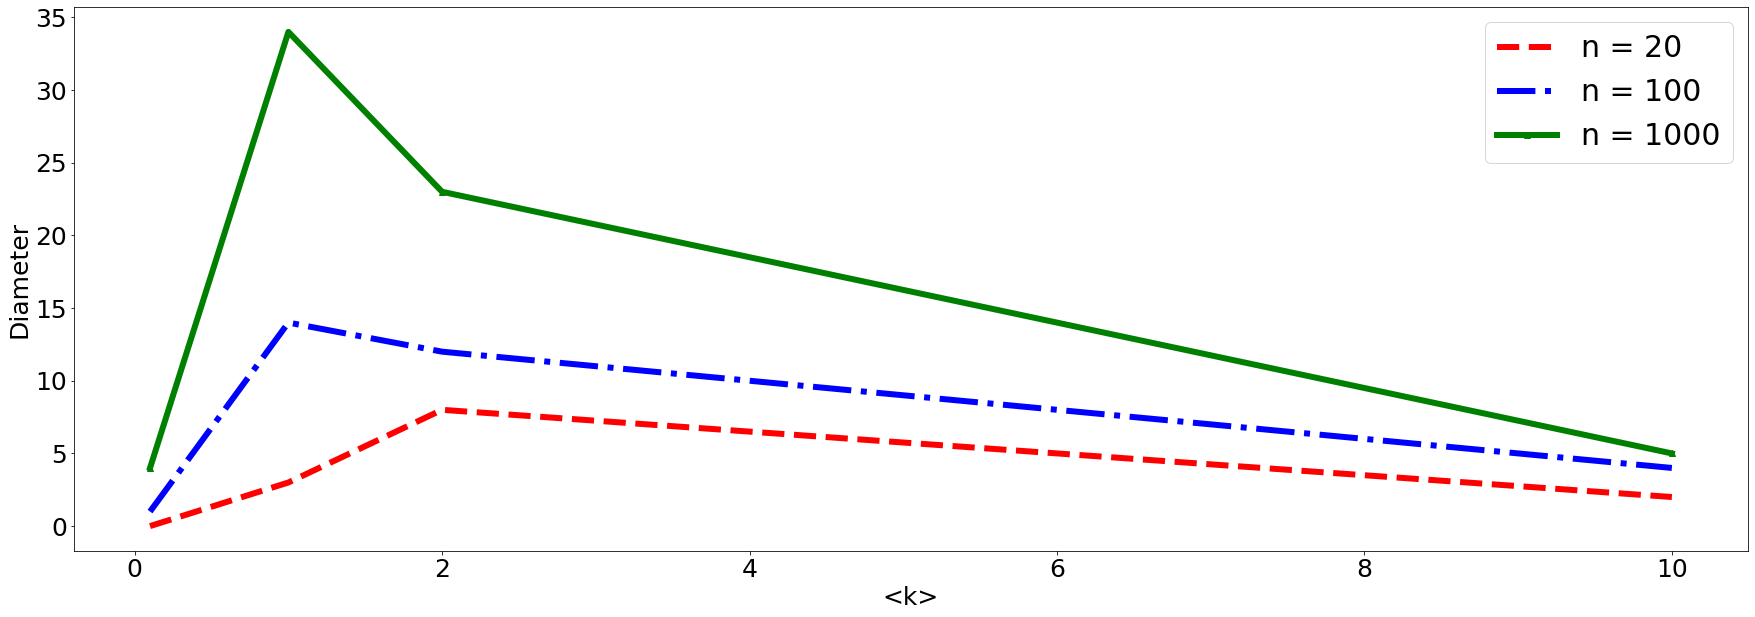

In [5]:
nodes = [20, 100, 1000]
k_values = 0.1, 1, 2, 10

plt.figure(figsize = (30,10))
fig_num = 130
dia_all = []

for n in nodes:
    dia_list = []
    for k in k_values:
        prob = k/(n-1)
        rG = nx.gnp_random_graph(n=n, p=prob)
        
        # Find diameter of the graph
        dia_list.append(my_graph.find_diameter(rG))
    print("Diameter list for n = {} and <k> = {}: {}".format(n,k_values,dia_list))
    dia_all.append(dia_list)
    
plt.plot(k_values, dia_all[0],'r--', label='n = 20',linewidth=6)
plt.plot(k_values, dia_all[1],'b-.', label='n = 100',linewidth=6)
plt.plot(k_values, dia_all[2],'g-^', label='n = 1000',linewidth=6)
plt.xticks(size=25)
plt.yticks(size=25)
plt.xlabel('<k>',size=25)
plt.ylabel('Diameter',size=25)
plt.legend(fontsize = 30)
print("\n\n")

#### Plot Diameter as function of n for each ⟨k⟩:

Diameter list for nodes = [20, 100, 1000] and <k> = 0.1: [1, 1, 2]
Diameter list for nodes = [20, 100, 1000] and <k> = 1: [5, 13, 29]
Diameter list for nodes = [20, 100, 1000] and <k> = 2: [8, 10, 21]
Diameter list for nodes = [20, 100, 1000] and <k> = 10: [3, 4, 5]





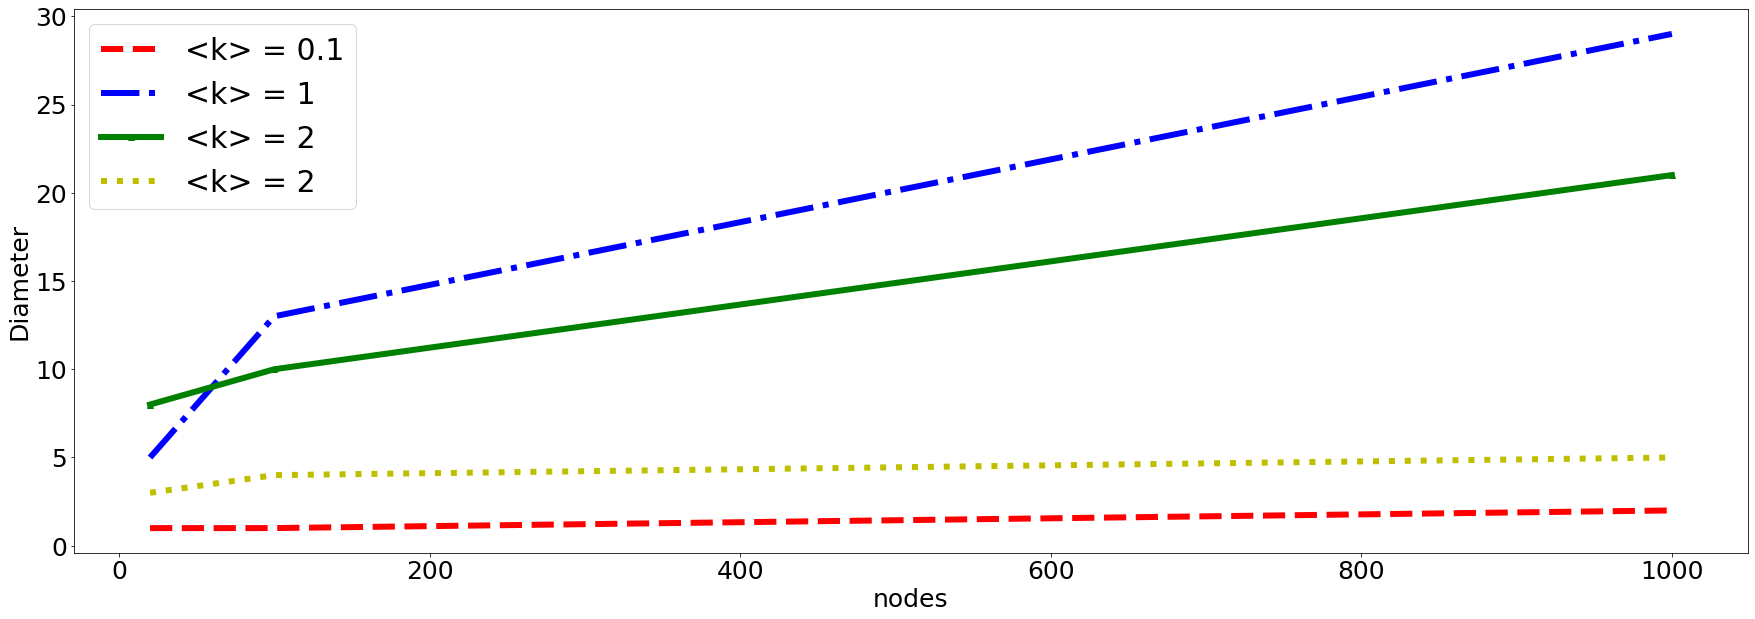

In [6]:
plt.figure(figsize = (30,10))
fig_num = 130
dia_all = []

for k in k_values:
    dia_list = []
    for n in nodes:
        prob = k/(n-1)
        rG = nx.gnp_random_graph(n=n, p=prob)
        
        # Find diameter of the graph
        dia_list.append(my_graph.find_diameter(rG))
    print("Diameter list for nodes = {} and <k> = {}: {}".format(nodes,k,dia_list))
    dia_all.append(dia_list)

plt.plot(nodes, dia_all[0],'r--', label='<k> = 0.1',linewidth=6)
plt.plot(nodes, dia_all[1],'b-.', label='<k> = 1',linewidth=6)
plt.plot(nodes, dia_all[2],'g-^', label='<k> = 2',linewidth=6)
plt.plot(nodes, dia_all[3],'y:', label='<k> = 2',linewidth=6)
plt.xticks(size=25)
plt.yticks(size=25)
plt.xlabel('nodes',size=25)
plt.ylabel('Diameter',size=25)
plt.legend(fontsize = 30)
print("\n\n")

#### b. Distance Distribution for n = 20, 100, 1000 of the random graph for ⟨k⟩ = 0.1, 1, 2, 10. 

>Note: if there is more than one component, disregard the distances between components, since they are infinite, and calculate the distances only in the giant component).

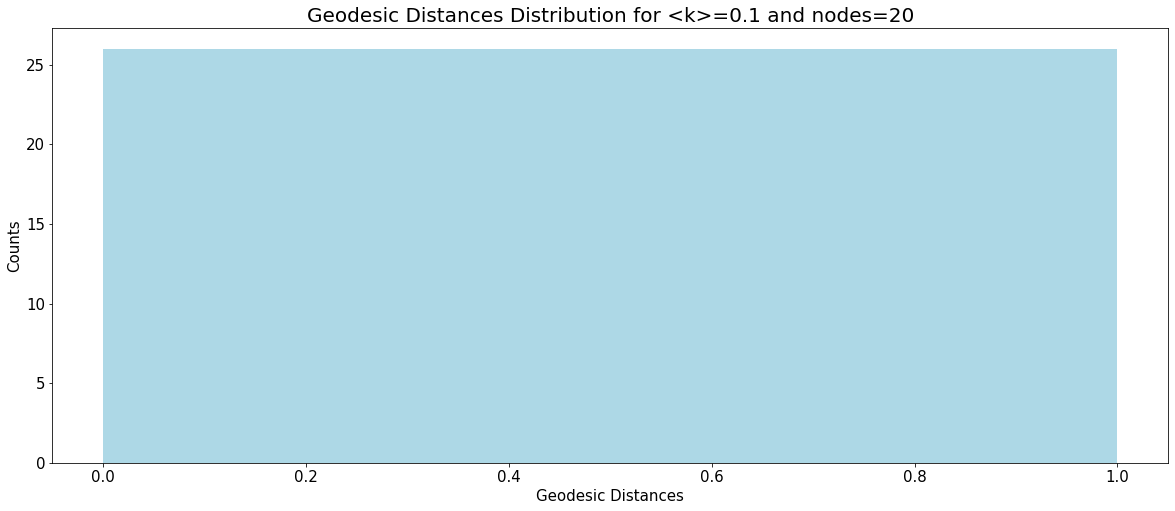

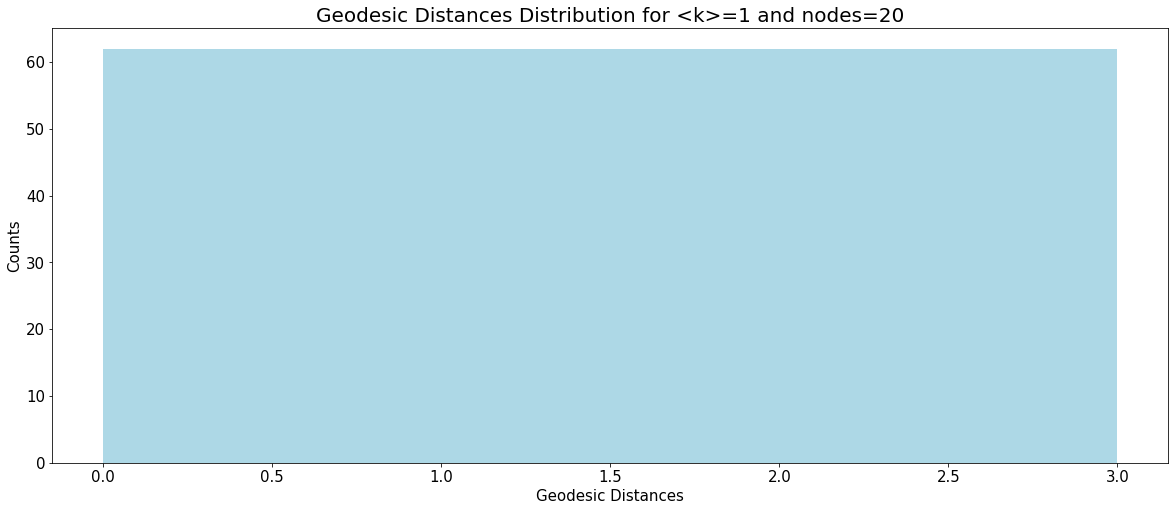

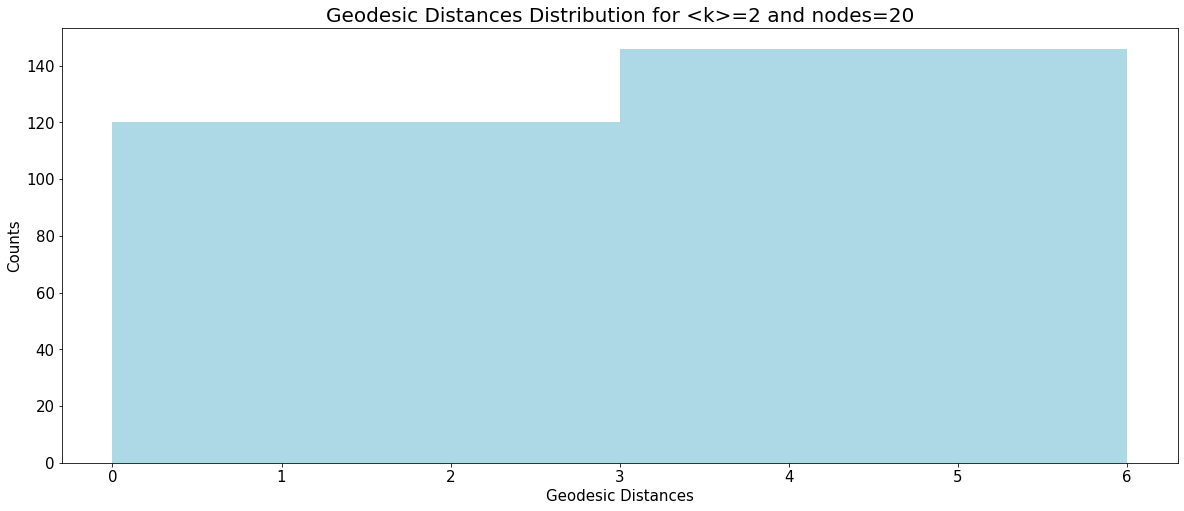

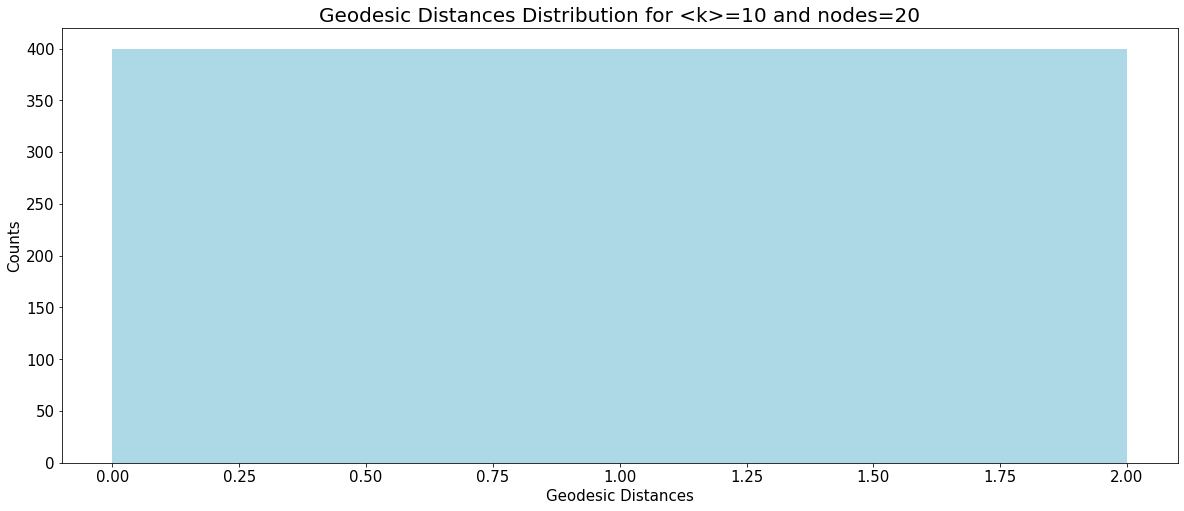

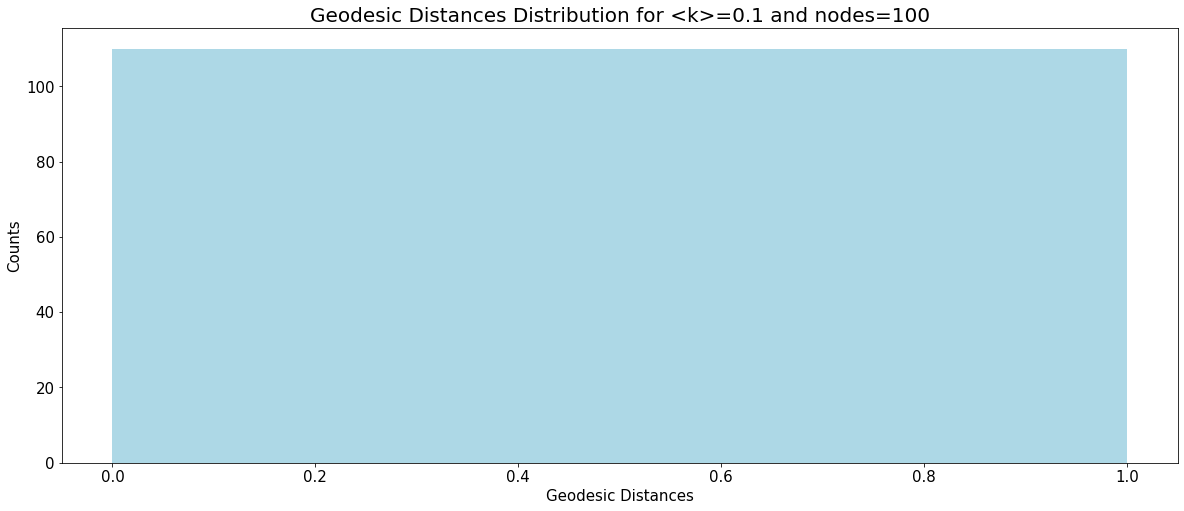

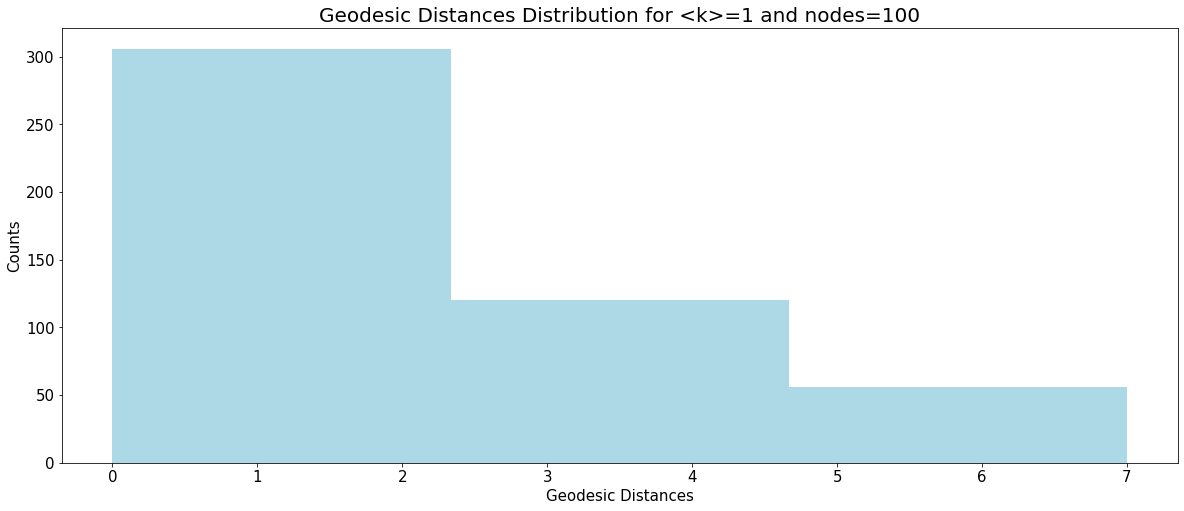

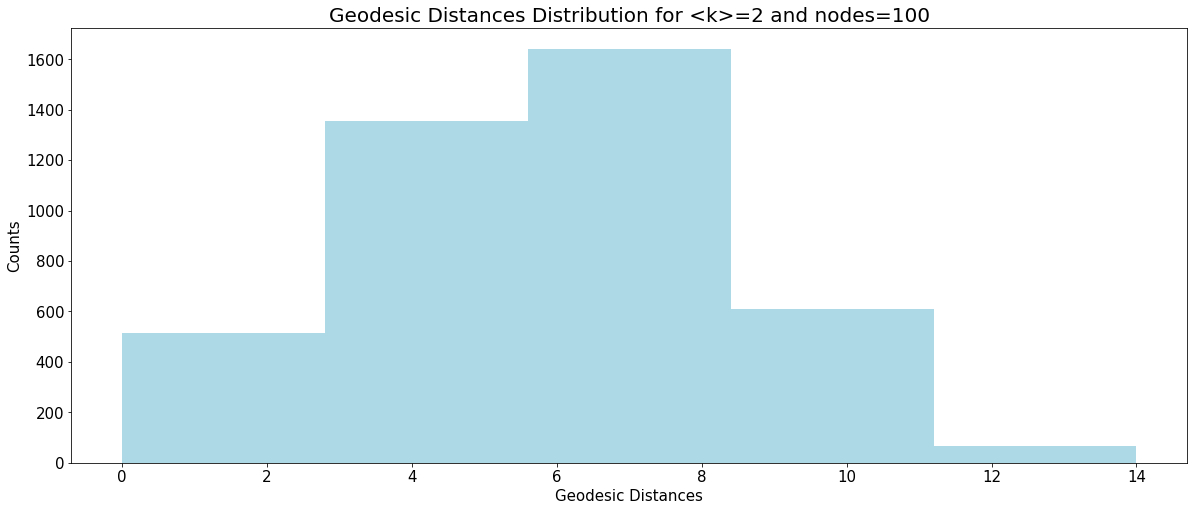

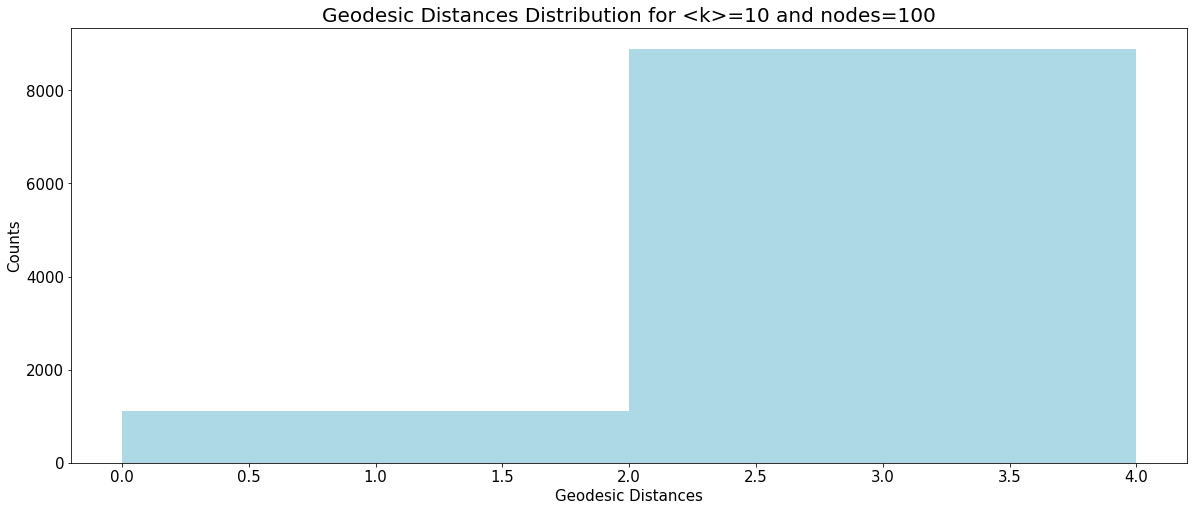

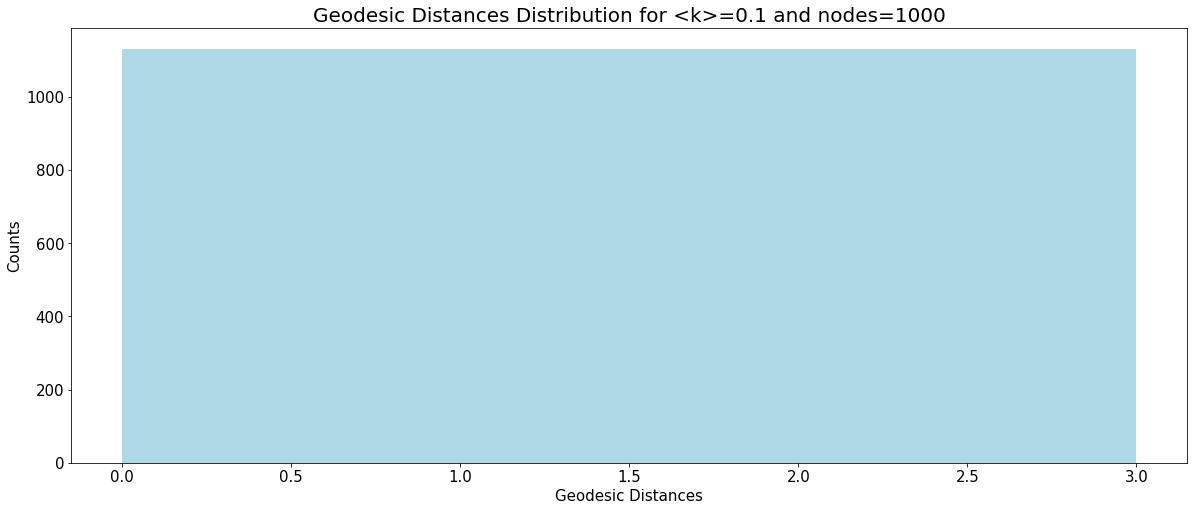

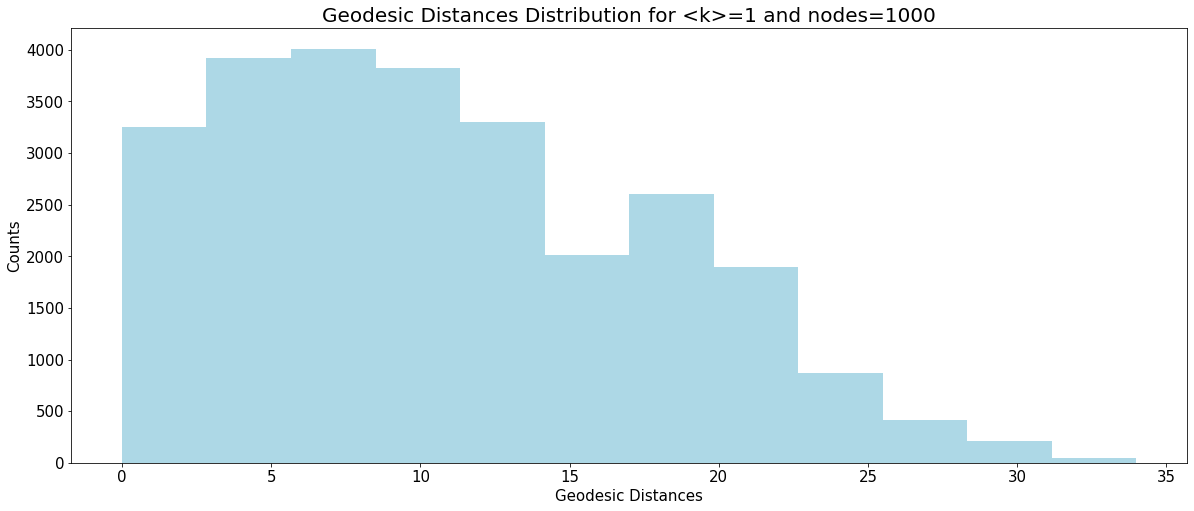

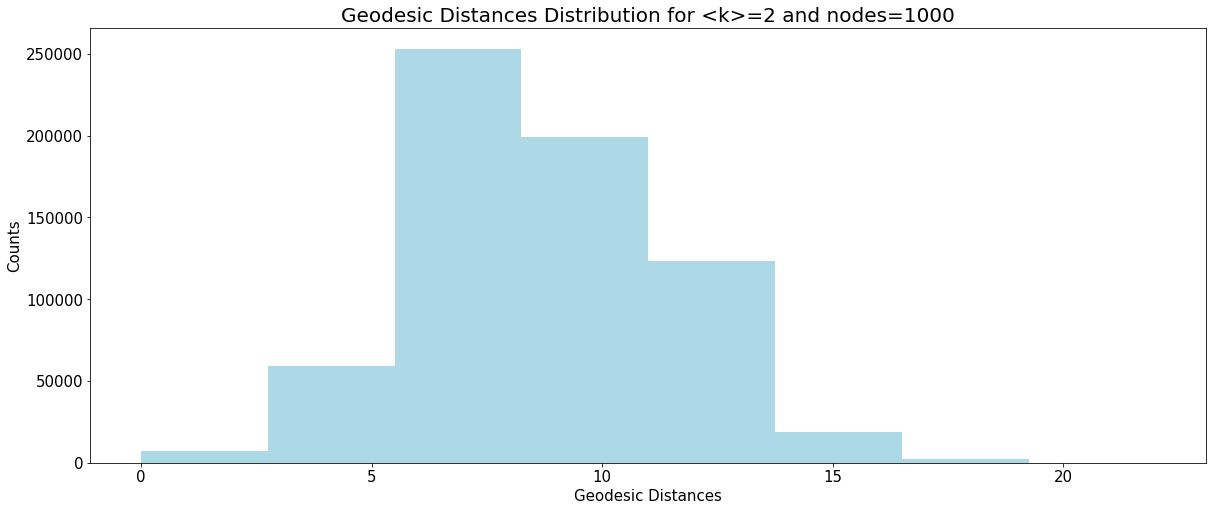

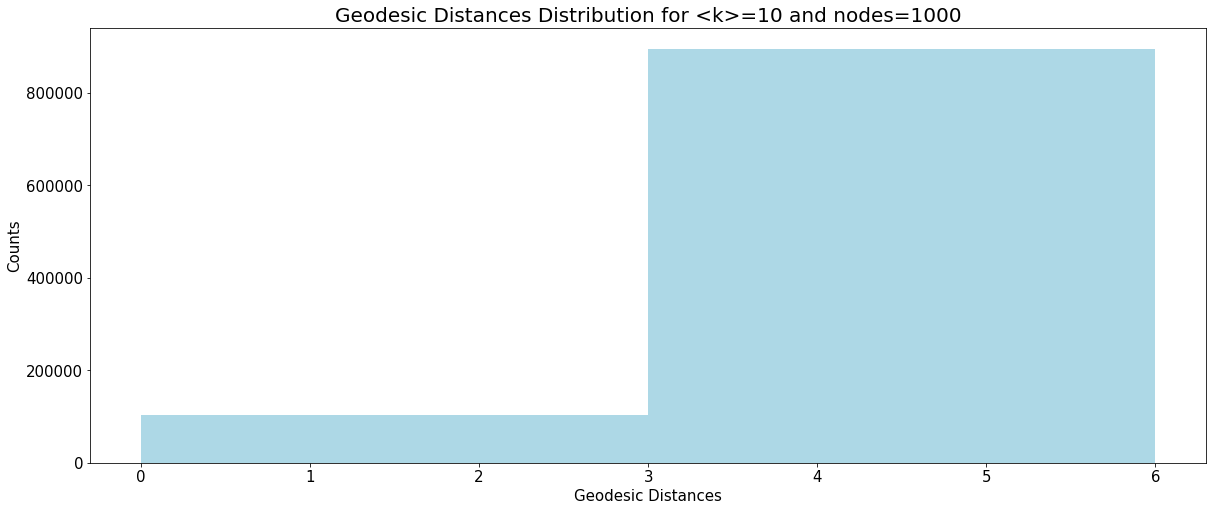

In [7]:
nodes = [20,100,1000]

for n in nodes:
    for k in k_values:
        prob = k/(n-1)
        rG = nx.gnp_random_graph(n=n, p=prob) 
        
        # Find geodesic distance for each node
        geo_dis = my_graph.find_geodesic_distance(rG)
        
        # plot historgram for geodesic distances of the graph
        my_graph.plot_distribution(in_list=geo_dis, pdf=False, cum=False, bw=3,\
                                title=f"Geodesic Distances Distribution for <k>={k} and nodes={n}",\
                                x_label="Geodesic Distances", y_label="Counts",\
                                x_scale="linear", y_scale="linear",\
                                c="lightblue")

    print("\n\n")

#### c. Discuss the dependence on ⟨k⟩, and n.

From the results for Diameter of each random graph, we can say that diameter is increasing with value n but approx to ln(n) which is compare to low then value of n.

We can say from the above distance distribution plots that, 

1. For ⟨𝑘⟩ = 0.1, only few nodes are connected.
2. For ⟨𝑘⟩ = 1, distance increase and no of nodes with that distance, which means that connected components in the graph increase.
3. For ⟨𝑘⟩ = 2, the peak of the graph shifts towards right of the plot like a Poisson distribution.
4. For ⟨𝑘⟩ = 10, the peak of the graph shifts towards left i.e distances between most of the nodes reduces and also the peak of the plot is very narrow and high.

### 4. The mean Eigenvector centrality and its distributions for n = 1000 of the random graph for the each value of ⟨k⟩. Discuss the dependence on ⟨k⟩.

#### a. The mean Eigenvector centrality and its distributions for n = 1000 of the random graph for the each value of ⟨k⟩:

#### Eigenvector Centrality:

A natural extension of the simple degree centrality is eigenvector centrality. Instead of awarding vertices just point for each neighbour, eigenvector centrality gives each vertex a score proportional to the sum of the scores of its neighbours.

The Eigenvector Centrality has nice property that it can be larger either because a vertex has many neighbours or it has important neighbours (or both).

The Eigenvector centrality for node $i$ is:  
$$x_{i} = \alpha \sum_{j} A_{ij} x_{j}$$

Here
* $A$ is the adjacency matrix of graph G.

The Mean Eigenvector Centralitiy for k = 0.1: 0.003


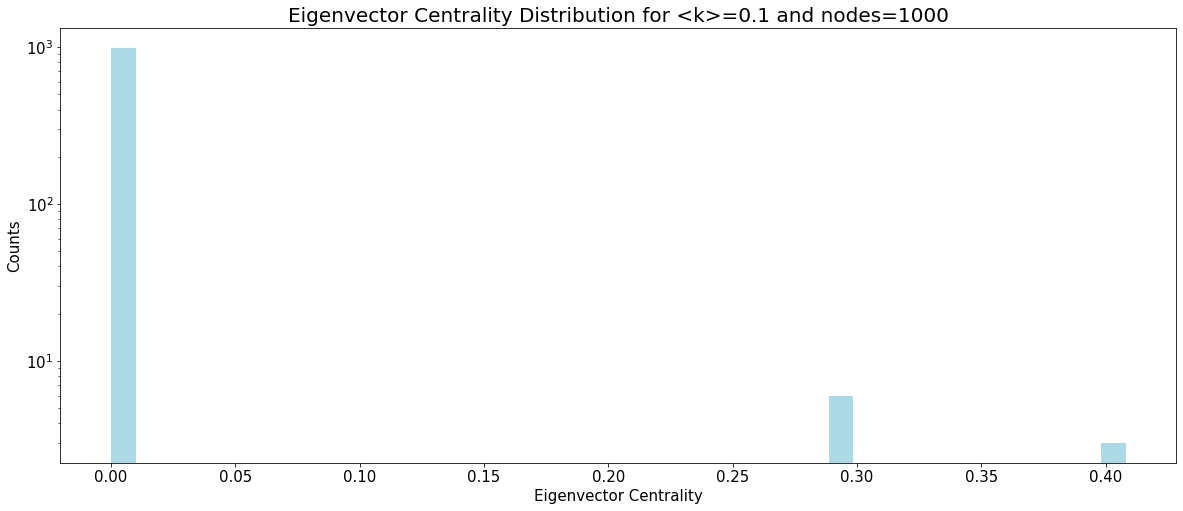

The Mean Eigenvector Centralitiy for k = 1: 0.004


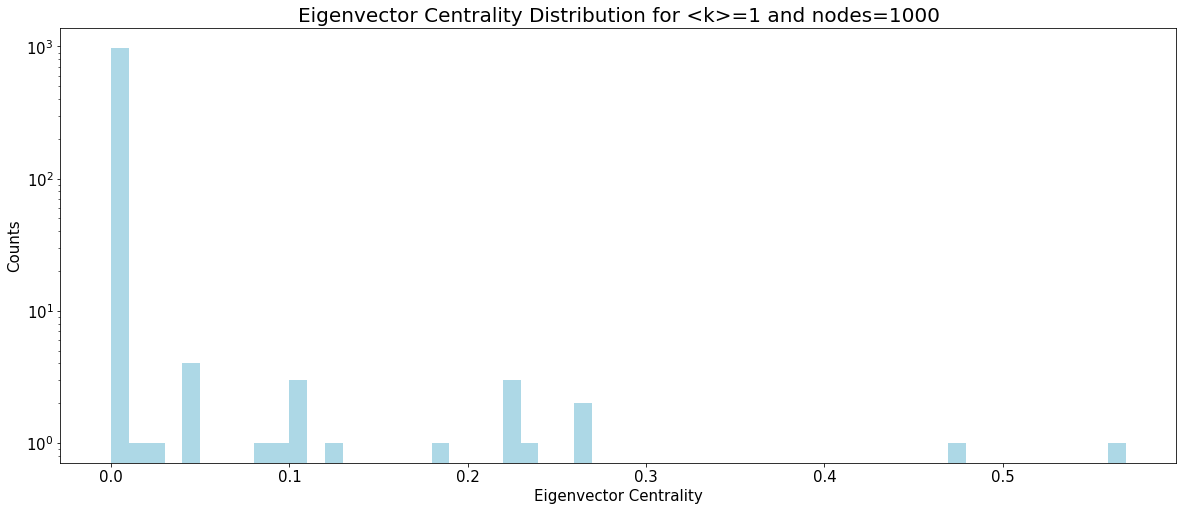

The Mean Eigenvector Centralitiy for k = 2: 0.015


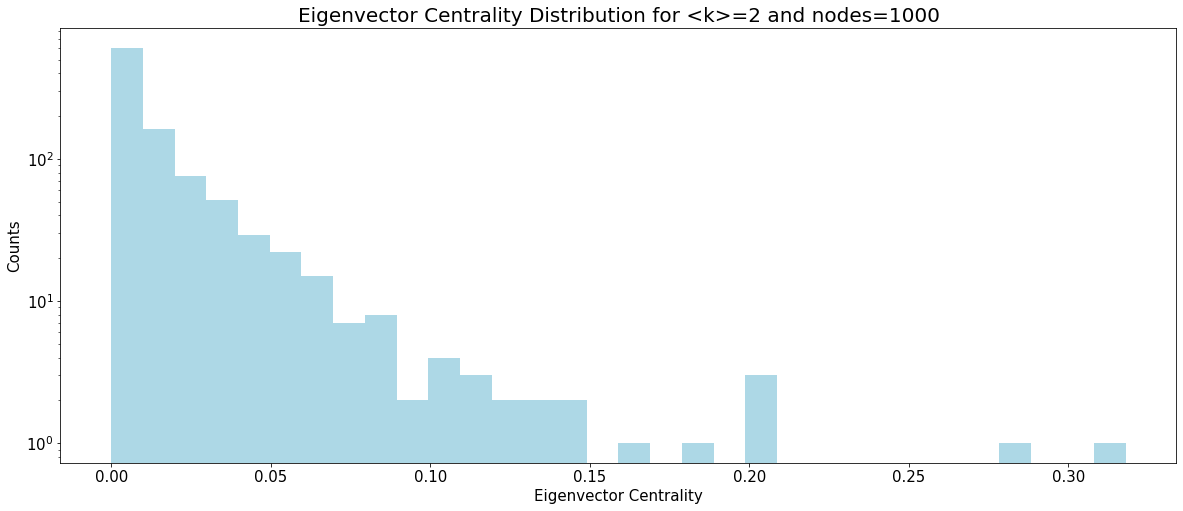

The Mean Eigenvector Centralitiy for k = 10: 0.03


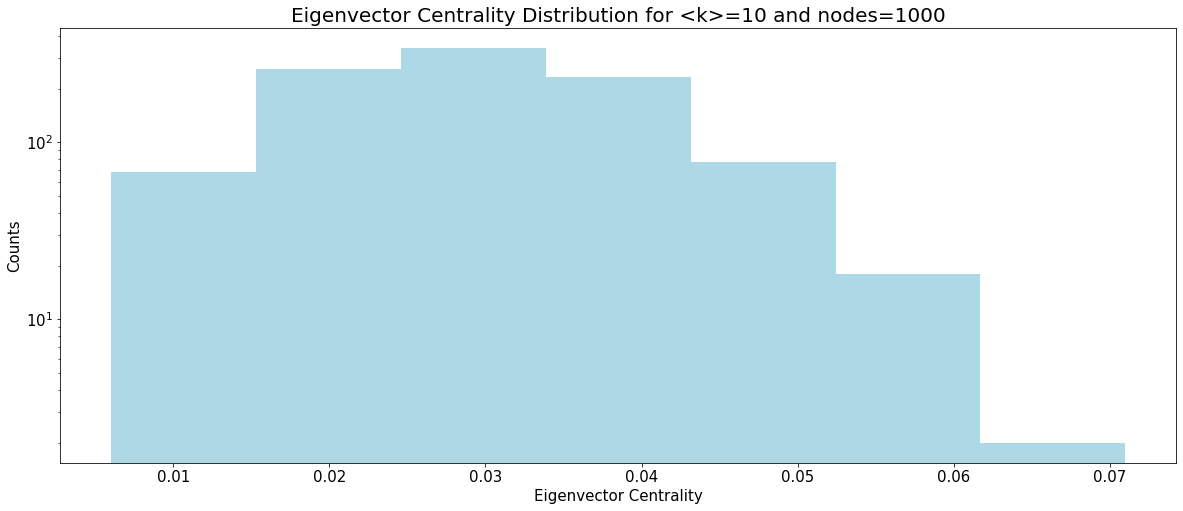

In [8]:
for i, rG in enumerate(rG_list):

    ev_cent = my_graph.find_eigenvector_centrality(rG, 1000)
    
    # Find mean eigenvector centrality
    mean_ev_cent = sum(ev_cent.values())/len(ev_cent.values())
    print("The Mean Eigenvector Centralitiy for k = {}: {}".format(k_values[i], round(mean_ev_cent,3)))
    
    # plot historgram for eigenvector centrality of the graph
    my_graph.plot_distribution(in_list=ev_cent.values(), pdf=False, cum=False, bw=0.01,\
                            title=f"Eigenvector Centrality Distribution for <k>={k_values[i]} and nodes={n}",\
                            x_label="Eigenvector Centrality", y_label="Counts",\
                            x_scale="linear", y_scale="log",\
                            c="lightblue")

#### b. Discuss the dependence on ⟨k⟩:

From the above distribution of Eigenvector Centrality, we can say that when value of k increases, plot starts to shift towards right of the plot like a Poisson distribution.

### 6. The mean betweenness centrality and its distributions for n = 1000 of the random graph for the each value of ⟨k⟩. Discuss the dependence on ⟨k⟩.

#### a. The mean betweenness centrality and its distributions for n = 1000 of the random graph for the each value of ⟨k⟩:

#### Betweenness Centrality:

Betweenness Centrality measures the extent to which a vertex lies on paths between other vertices. It measure centrality based on shortest paths in a graph.

The Betweenness Centrality for node i is:
  
$$x_{i} = \sum_{st} \frac{n_{st,i}}{g_{st}}$$


Here, 

* ${n_{st,i}}$ is number of geodesic paths from s to t that pass through i.
* ${g_{st}}$ is total number of geodesic paths from s to t.

The Mean Betweenness centralitiy for k = 0.1: 0.0
The Mean Betweenness centralitiy for k = 1: 0.0


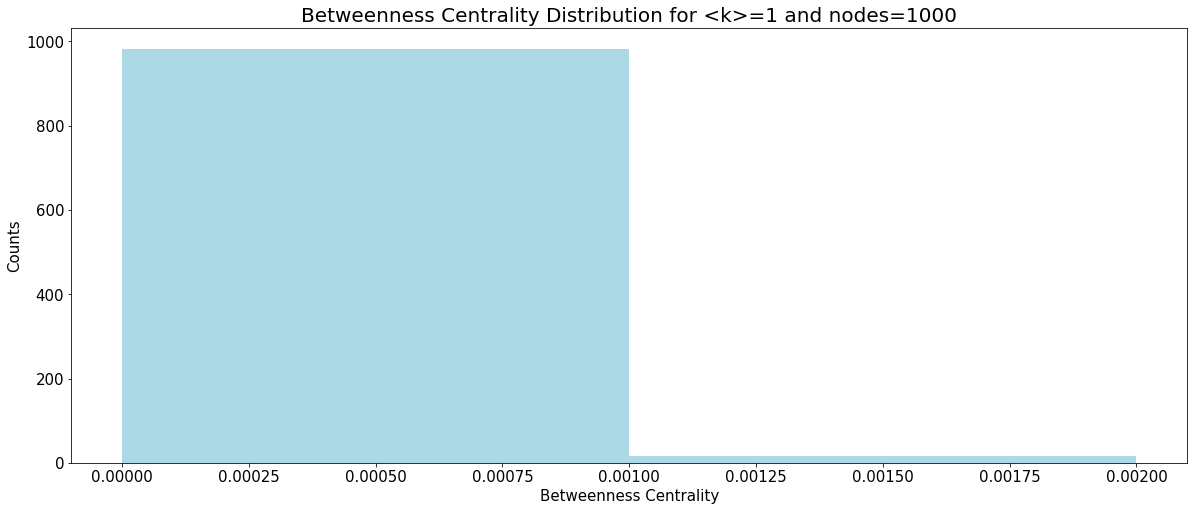

The Mean Betweenness centralitiy for k = 2: 0.005


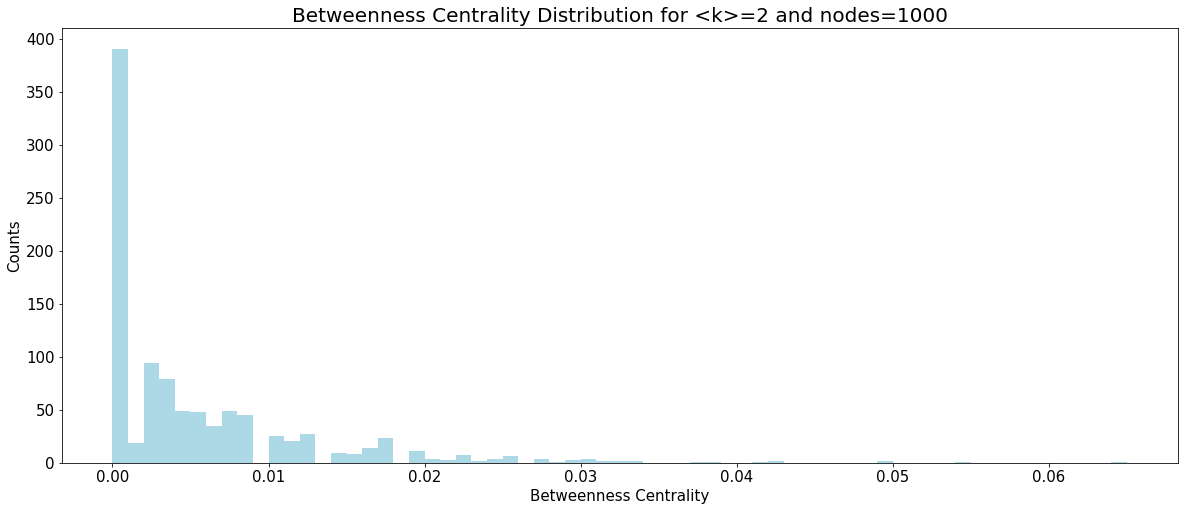

The Mean Betweenness centralitiy for k = 10: 0.002


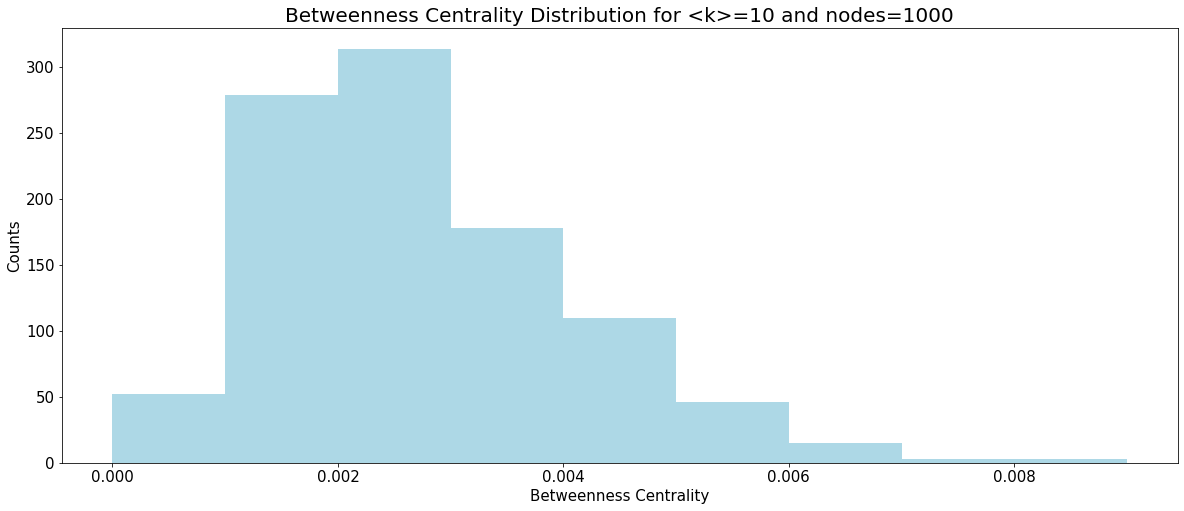

In [9]:
for i, rG in enumerate(rG_list):

    bw_cent = my_graph.find_betweenness_centrality(rG)
    
    # Find mean betweenness centrality
    mean_bw_cent = sum(bw_cent.values())/len(bw_cent.values())
    print("The Mean Betweenness centralitiy for k = {}: {}".format(k_values[i], round(mean_bw_cent,3)))
    
    if mean_bw_cent > 0:
        # plot historgram for betweenness centrality of the graph
        my_graph.plot_distribution(in_list=bw_cent.values(), pdf=False, cum=False, bw=0.001,\
                title=f"Betweenness Centrality Distribution for <k>={k_values[i]} and nodes={n}",\
                x_label="Betweenness Centrality", y_label="Counts",\
                x_scale="linear", y_scale="linear", c="lightblue")
    i += 1

#### b. Discuss the dependence on ⟨k⟩:

From the above distribution of Betweenness Centrality, we can say that when value of k increases, plot starts to shift towards right of the plot like a Poisson distribution.

### 7. The mean closeness centrality and its distributions for n = 1000 of the random graph for the each value of ⟨k⟩. Discuss the dependence on ⟨k⟩.

#### a. The mean closeness centrality and its distributions for n = 1000 of the random graph for the each value of ⟨k⟩:

#### Closeness Centrality:

Closeness Centrality measures that how close a node is to all other nodes in the network.. 

The Closeness Centrality for node i is:

$$ cc_{i} = \frac{1}{d_{i}} = \frac{(n-1)}{\sum_{j} d_{ij}}$$

Here:
* $d_{ij}$ is the length of a geodesic path from i to j
* $d_{i}$ is mean geodesic distance from i to j
* n is number of nodes in the network

The Mean Clossness Centrality for k = 0.1: 0.0


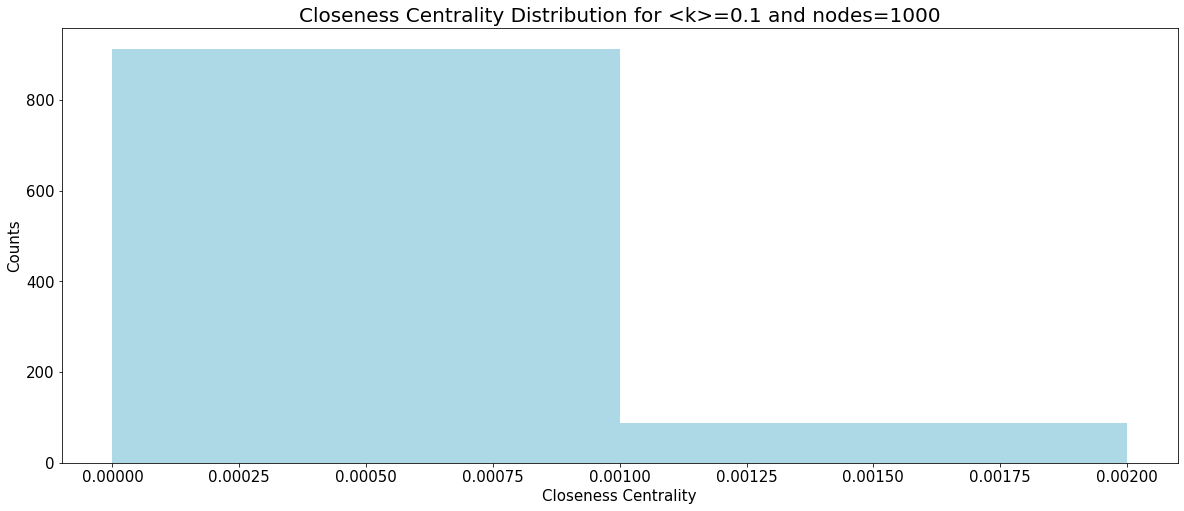

The Mean Clossness Centrality for k = 1: 0.002


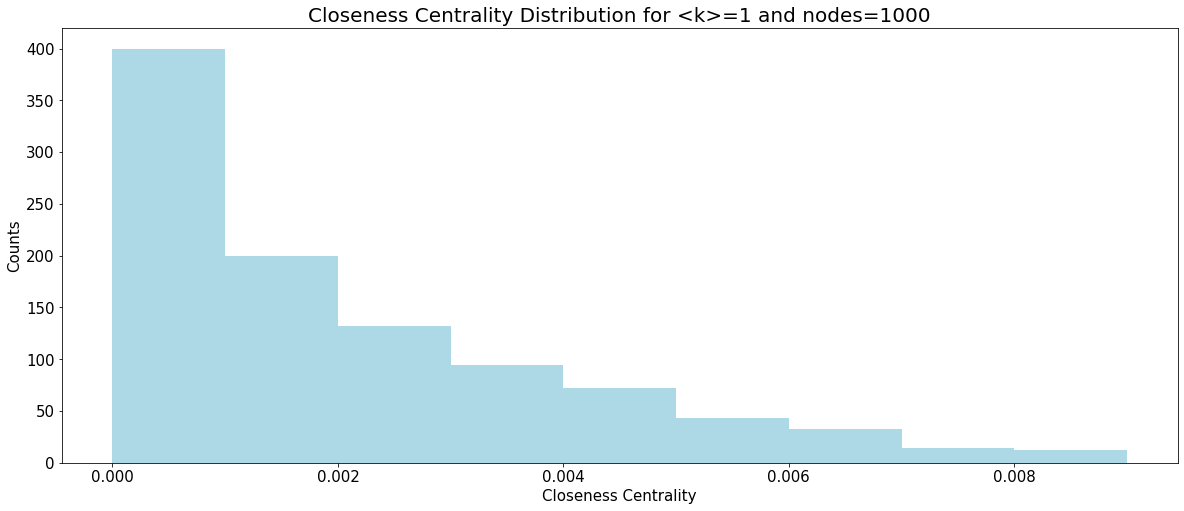

The Mean Clossness Centrality for k = 2: 0.085


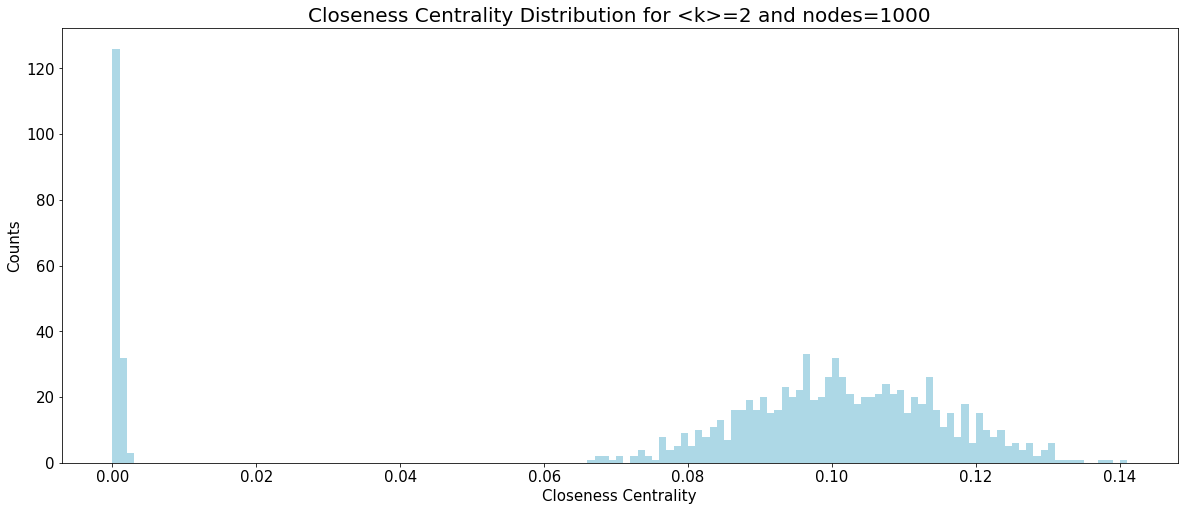

The Mean Clossness Centrality for k = 10: 0.31


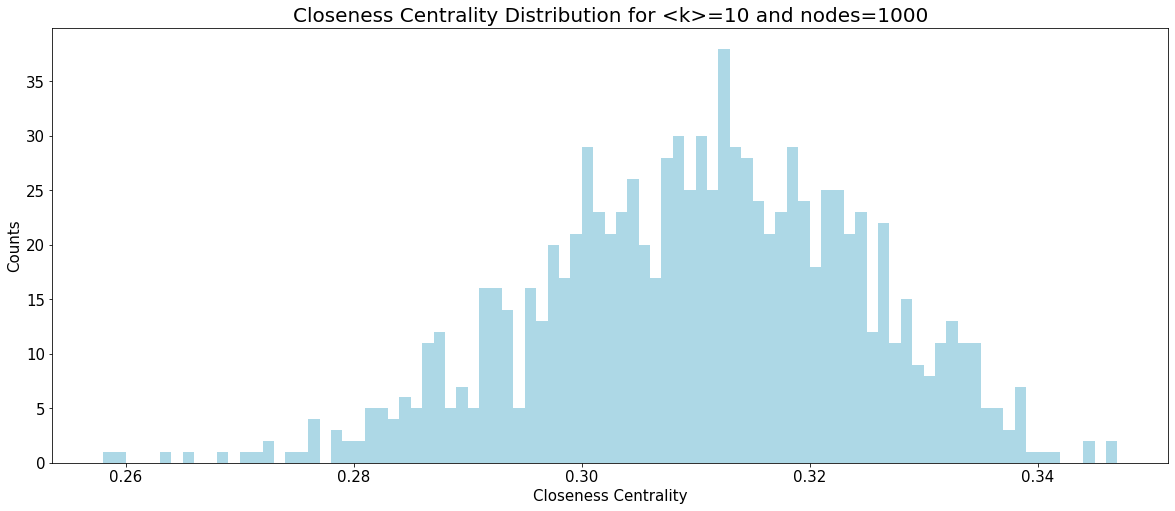

In [10]:
for i, rG in enumerate(rG_list):
    
    closs_cent = my_graph.find_closeness_centrality(rG)
 
    # Find mean closeness centrality 
    mean_closs_cent = sum(closs_cent.values())/len(closs_cent.values())
    print("The Mean Clossness Centrality for k = {}: {}".format(k_values[i], round(mean_closs_cent,3)))
    
    # plot historgram for closeness centrality of the graph
    my_graph.plot_distribution(in_list=closs_cent.values(), pdf=False, cum=False, bw=0.001,\
            title=f"Closeness Centrality Distribution for <k>={k_values[i]} and nodes={n}",\
            x_label="Closeness Centrality", y_label="Counts",\
            x_scale="linear", y_scale="linear", c="lightblue")

#### b. Discuss the dependence on ⟨k⟩:

From the above distribution of Closeness Centrality, we can say that when value of k increases, plot starts to shift towards right of the plot like a Poisson distribution.

### 9. Calculate the mean clustering coefficient for n = 20, 100, 1000 of the random graph for the each value of ⟨k⟩. Discuss the dependence on ⟨k⟩ and n: 

Mean Clustering Coefficient for n = 20 and <k> = (0.1, 1, 2, 10): [0.0, 0.0, 0.0, 0.50484]
Mean Clustering Coefficient for n = 100 and <k> = (0.1, 1, 2, 10): [0.0, 0.01433, 0.0, 0.10501]
Mean Clustering Coefficient for n = 1000 and <k> = (0.1, 1, 2, 10): [0.0, 0.0, 0.00205, 0.00918]





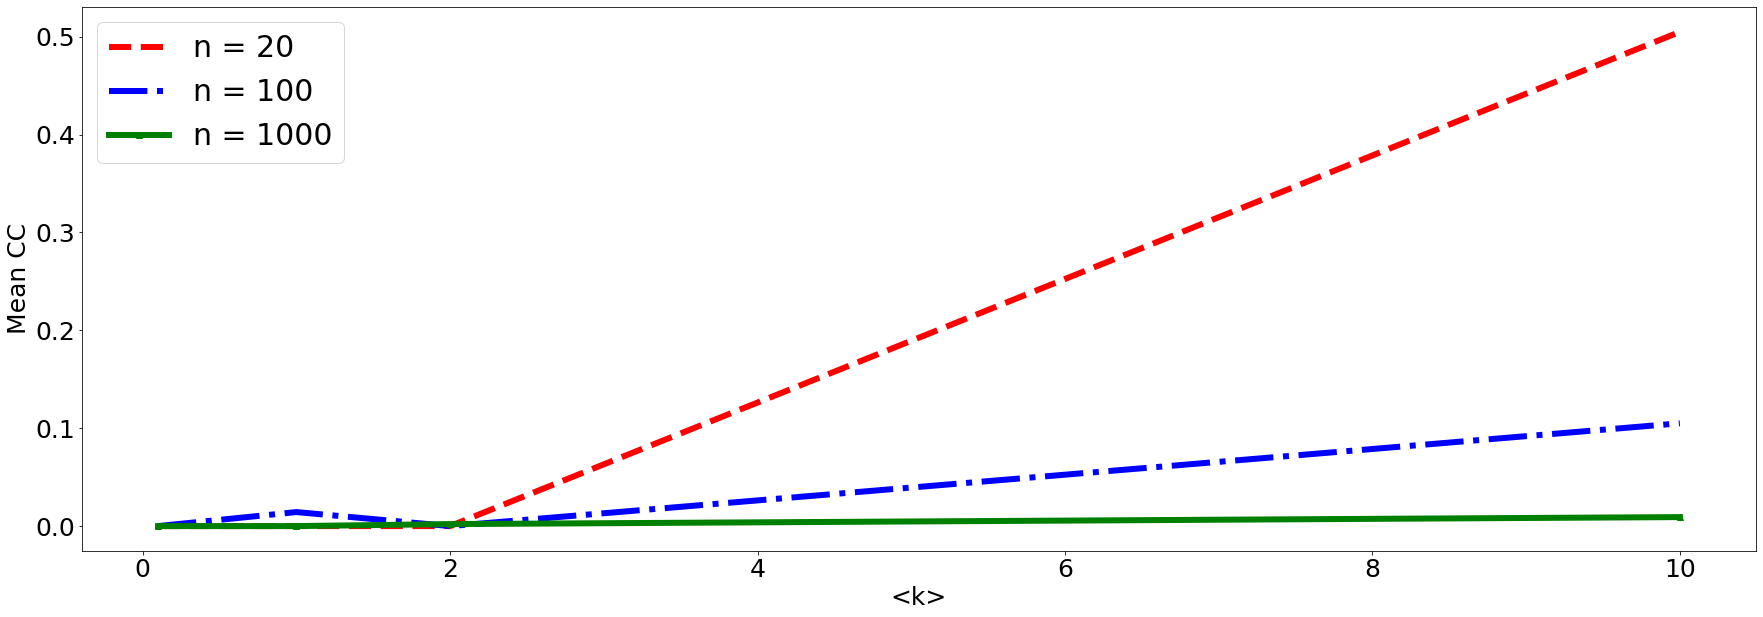

In [13]:
plt.figure(figsize = (30,10))
fig_num = 130
mean_cc_all = []

for n in nodes:
    mean_cc_list = []
    for k in k_values:
        prob = k/(n-1)
        rG = nx.gnp_random_graph(n=n, p=prob)
        
        # Find Mean Clustering Coefficient of the graph
        mean_cc_list.append(round(nx.average_clustering(rG),5))
        
    print("Mean Clustering Coefficient for n = {} and <k> = {}: {}".format(n,k_values,mean_cc_list))
    
    mean_cc_all.append(mean_cc_list)
    
plt.plot(k_values, mean_cc_all[0],'r--', label='n = 20',linewidth=6)
plt.plot(k_values, mean_cc_all[1],'b-.', label='n = 100',linewidth=6)
plt.plot(k_values, mean_cc_all[2],'g-^', label='n = 1000',linewidth=6)
plt.xticks(size=25)
plt.yticks(size=25)
plt.xlabel('<k>',size=25)
plt.ylabel('Mean CC',size=25)
plt.legend(fontsize = 30)
print("\n\n")

#### Plot CC as function of n for each ⟨k⟩.

Mean Clustering Coefficient for nodes = [20, 100, 1000] and <k> = 0.1: [0.0, 0.0, 0.0]
Mean Clustering Coefficient for nodes = [20, 100, 1000] and <k> = 1: [0.0, 0.0, 0.00073]
Mean Clustering Coefficient for nodes = [20, 100, 1000] and <k> = 2: [0.0, 0.02, 0.0005]
Mean Clustering Coefficient for nodes = [20, 100, 1000] and <k> = 10: [0.54649, 0.10074, 0.01041]





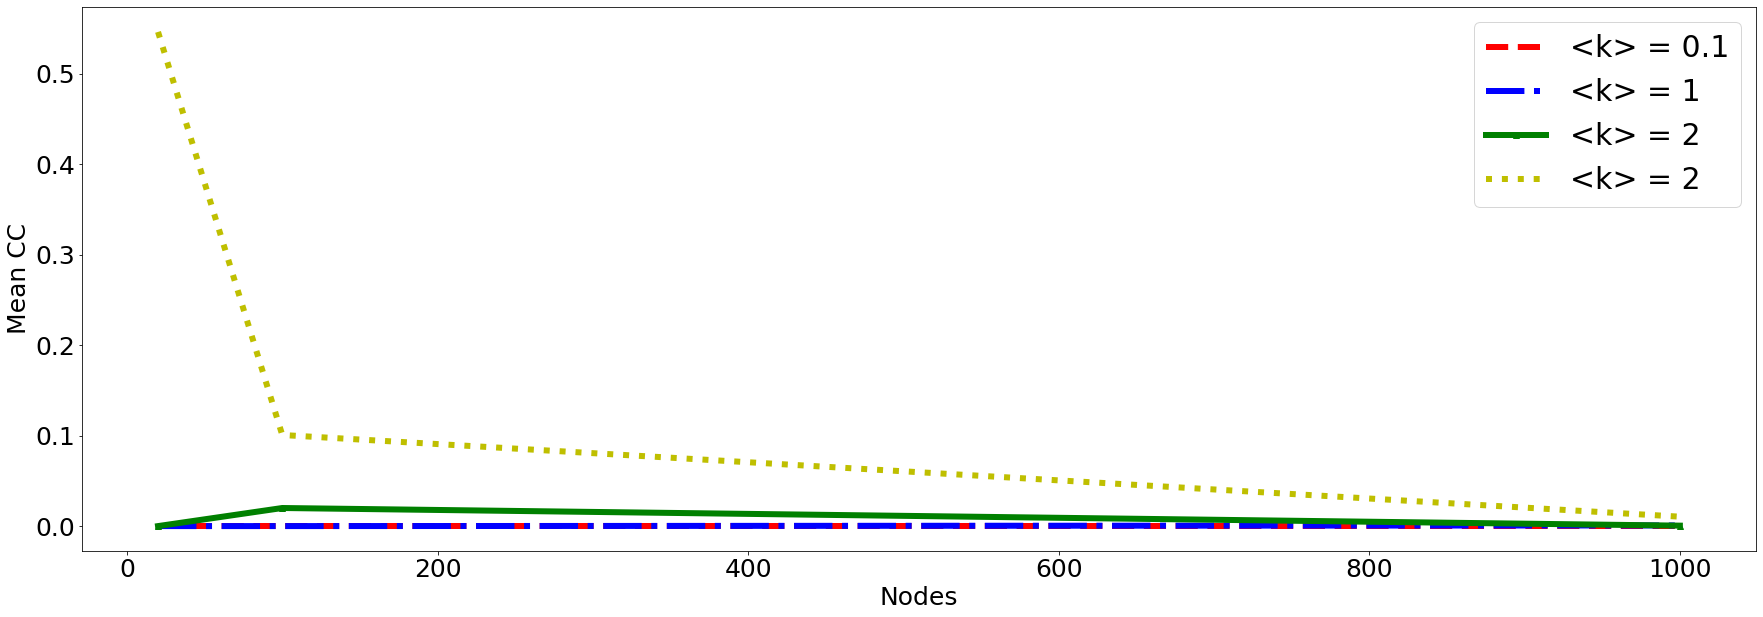

In [14]:
plt.figure(figsize = (30,10))
fig_num = 130
mean_cc_all = []

for k in k_values:
    mean_cc_list = []
    for n in nodes:
        prob = k/(n-1)
        rG = nx.gnp_random_graph(n=n, p=prob)
        
        # Find Mean Clustering Coefficient of the graph
        mean_cc_list.append(round(nx.average_clustering(rG),5))
        
    print("Mean Clustering Coefficient for nodes = {} and <k> = {}: {}".format(nodes,k,mean_cc_list))
    
    mean_cc_all.append(mean_cc_list)
    
plt.plot(nodes, mean_cc_all[0],'r--', label='<k> = 0.1',linewidth=6)
plt.plot(nodes, mean_cc_all[1],'b-.', label='<k> = 1',linewidth=6)
plt.plot(nodes, mean_cc_all[2],'g-^', label='<k> = 2',linewidth=6)
plt.plot(nodes, mean_cc_all[3],'y:', label='<k> = 2',linewidth=6)
plt.xticks(size=25)
plt.yticks(size=25)
plt.xlabel('Nodes',size=25)
plt.ylabel('Mean CC',size=25)
plt.legend(fontsize = 30)
print("\n\n")